# Artigo 5
* Aluno: Paulo Henrique Costa Gontijo
* Matrícula: 15/0143800
* Lição: *Random forests*
* Notebooks: 
  * *How random forests really work*
  * *Tabular Modeling Deep Dive*

| Hitórico de versão | Data |
|:--------------------:|:------:|
| v1 | 18/01/2023 |

## Propósito
Este artigo tem a intenção de documentar o passo a passo da quarta lição do curso, mostrando os blocos de códigos, o resultado das execuções, eventuais problemas encontrados e, se houver, as possíveis soluções para os problemas.

## Tema
A lição 6 do curso FastAi demonstra os pilares do algoritmo Random Forest e,
para tal, ensina seus fundamentos como Decision Tree. também são apresentadas técnicas de análise de importância de funcionalidade, métricas de parametrização, erros e afins.

## Instalação das Bibliotecas


In [1]:
!pip install  fastai seaborn  matplotlib sklearn -q

## Importação das Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import fastai
import seaborn as sns
import matplotlib.pyplot as plt

## Download do Dataset
O escolhido para este artigo foi o ADULT SAMPLE, disponibilizado pela próprio *framework* **FastAI**. Este dataset contém informações a respeito da renda de pessoas em detrimento do censo populacional.

De acordo com a [documentação](https://archive.ics.uci.edu/ml/datasets/Adult) do prórpio dataset, os atributos tem as especificações seguintes:

Listing of attributes:

>50K, <=50K.

* age: continuous
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)
path    

Path('/root/.fastai/data/adult_sample')

In [4]:
df = pd.read_csv(path/'adult.csv', )
df.head()

age          workclass  fnlwgt     education  education-num  \
0   49            Private  101320    Assoc-acdm           12.0   
1   44            Private  236746       Masters           14.0   
2   38            Private   96185       HS-grad            NaN   
3   38       Self-emp-inc  112847   Prof-school           15.0   
4   42   Self-emp-not-inc   82297       7th-8th            NaN   

        marital-status        occupation    relationship                 race  \
0   Married-civ-spouse               NaN            Wife                White   
1             Divorced   Exec-managerial   Not-in-family                White   
2             Divorced               NaN       Unmarried                Black   
3   Married-civ-spouse    Prof-specialty         Husband   Asian-Pac-Islander   
4   Married-civ-spouse     Other-service            Wife                Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country salary  
0   Female             0          1902              40   United-States  >=50k  
1     Male         10520             0              45   United-States  >=50k  
2   Female             0             0              32   United-States   <50k  
3     Male             0             0              40   United-States  >=50k  
4   Female             0             0              50   United-States   <50k

['Erros', 999, 'Colunas', 15, 'Núm. de registros', 32561]


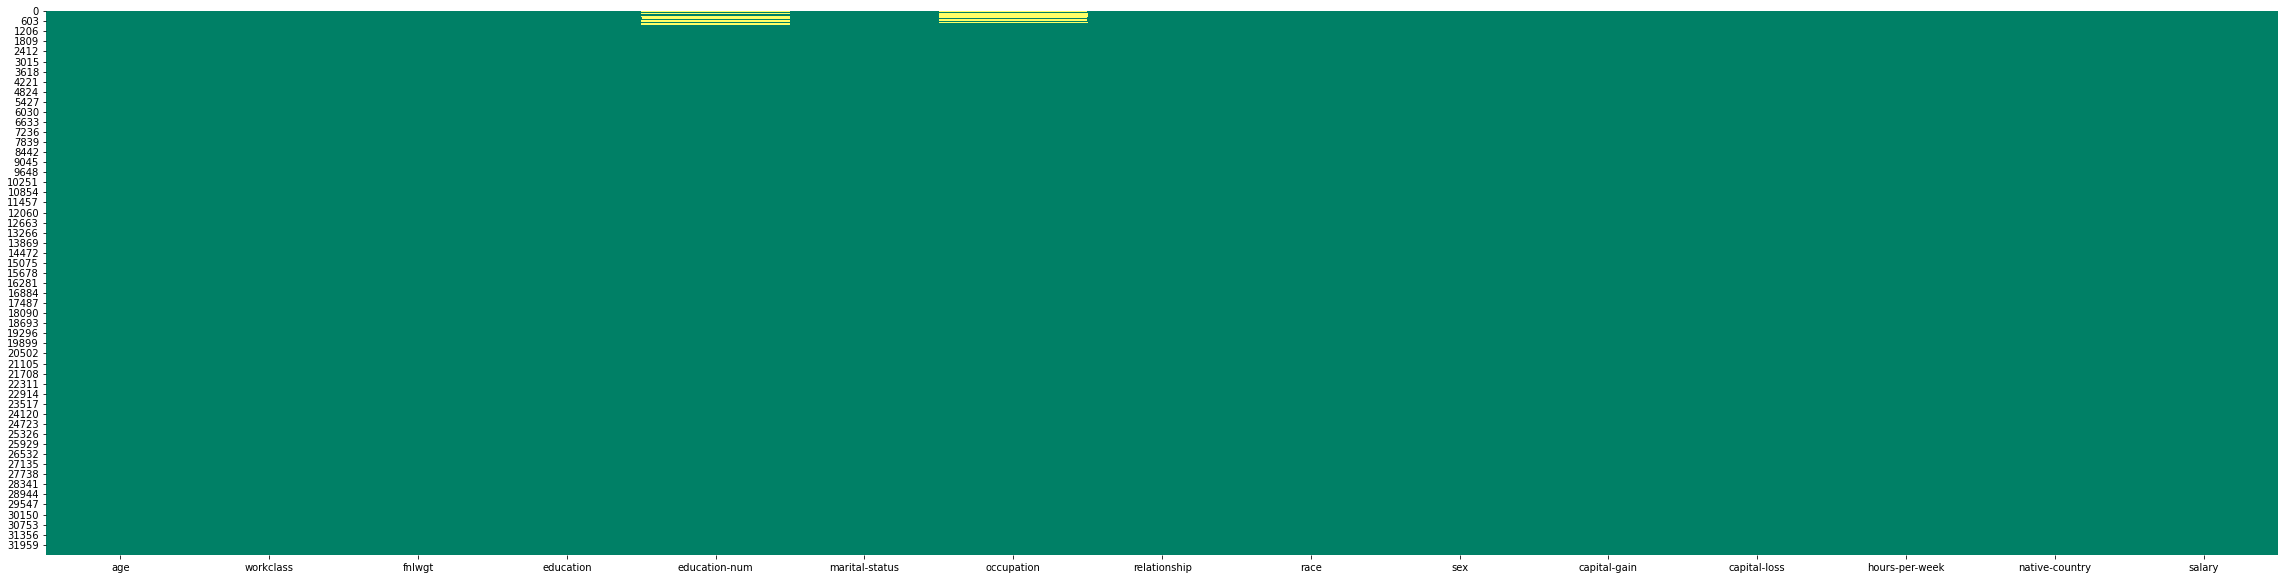

In [5]:
def data_state(output):
    plt.figure(figsize=(40,10))
    sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
    print(["Erros",np.sum(output.isnull().sum()),"Colunas",len(output.columns),"Núm. de registros", len(output)])

data_state(df)

In [6]:
df.fillna(df.mode().loc[0], inplace=True)
df.head()

age          workclass  fnlwgt     education  education-num  \
0   49            Private  101320    Assoc-acdm           12.0   
1   44            Private  236746       Masters           14.0   
2   38            Private   96185       HS-grad            9.0   
3   38       Self-emp-inc  112847   Prof-school           15.0   
4   42   Self-emp-not-inc   82297       7th-8th            9.0   

        marital-status        occupation    relationship                 race  \
0   Married-civ-spouse    Prof-specialty            Wife                White   
1             Divorced   Exec-managerial   Not-in-family                White   
2             Divorced    Prof-specialty       Unmarried                Black   
3   Married-civ-spouse    Prof-specialty         Husband   Asian-Pac-Islander   
4   Married-civ-spouse     Other-service            Wife                Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country salary  
0   Female             0          1902              40   United-States  >=50k  
1     Male         10520             0              45   United-States  >=50k  
2   Female             0             0              32   United-States   <50k  
3     Male             0             0              40   United-States  >=50k  
4   Female             0             0              50   United-States   <50k

['Erros', 0, 'Colunas', 15, 'Núm. de registros', 32561]


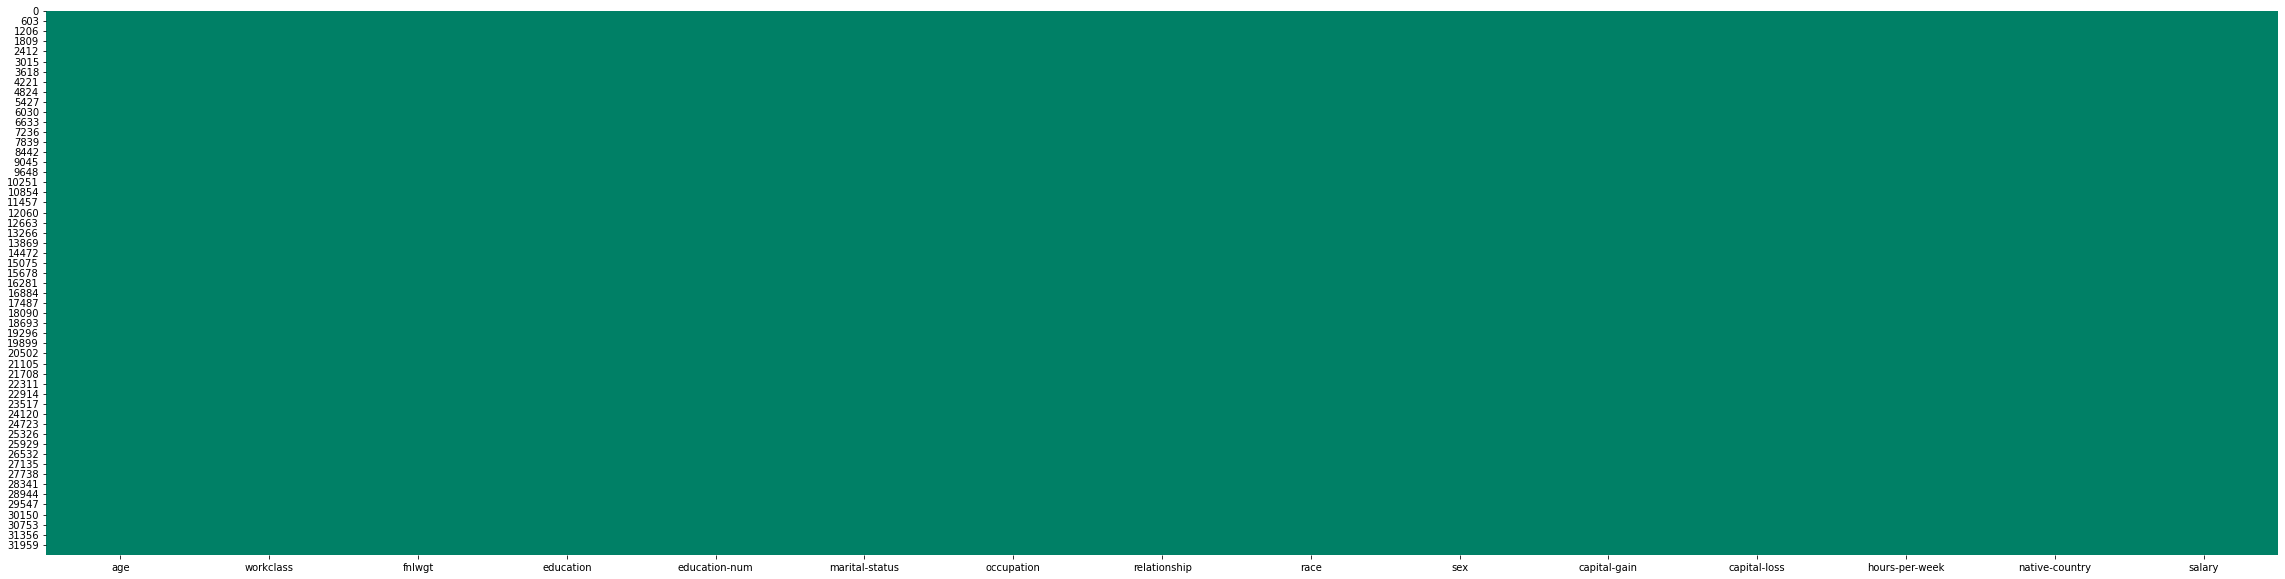

In [7]:
data_state(df)

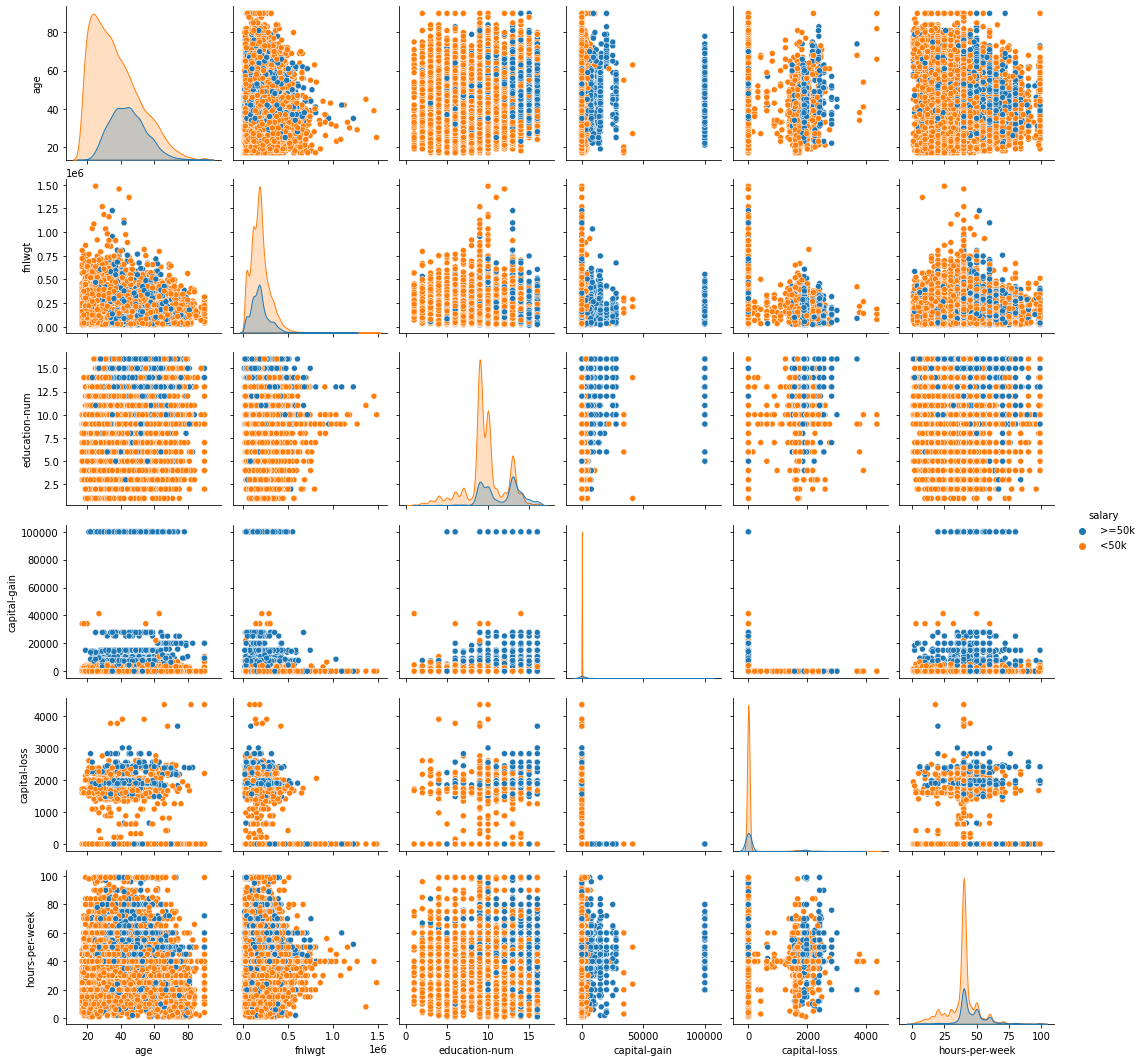

In [8]:
sns.pairplot(data=df, hue='salary')
plt.show()

In [9]:
cats = df.describe(include=[object]).columns.tolist()
df.describe(include=[object])

workclass education       marital-status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4585        13193   

          race    sex  native-country salary  
count    32561  32561           32561  32561  
unique       5      2              42      2  
top      White   Male   United-States   <50k  
freq     27816  21790           29170  24720

In [10]:
conts = list(df.select_dtypes(exclude = "object").columns)
df.describe(exclude=[object])

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.063665   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.557046   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

## Criando uma Árvore de Decisão

* Mudando tipo de colunas categóricas:

In [11]:
for col in cats:
        df[col] = pd.Categorical(df[col])

* Categorizando colunas string:

In [12]:
df_lbl = df.copy()
df_lbl[cats] = df_lbl[cats].apply(lambda x: x.cat.codes)

* Criando dataset de treino e teste:

In [14]:
from numpy import random
from sklearn.model_selection import train_test_split

X = df_lbl.drop('salary', axis=1).copy()
y = df_lbl['salary'].copy()

random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=104)

* Criando estrutura de treinamento da árvore:

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=42)

* Treinando o modelo:

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, random_state=42)

* Realizando predições:

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))
error = mean_absolute_error(y_test, clf.predict(X_test))
print('DecisionTreeClassifier error rate: {}'.format(error))

DecisionTreeClassifier accuracy score: 0.8314140948871488
DecisionTreeClassifier error rate: 0.1685859051128512


* Desenhando árvore de decisão:

In [21]:
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

draw_tree(clf, X_train)

> Tentei dei várias formas desenhar a árvore mas não obtive sucesso, o resultado foi este acima.

## Medindo importância de colunas

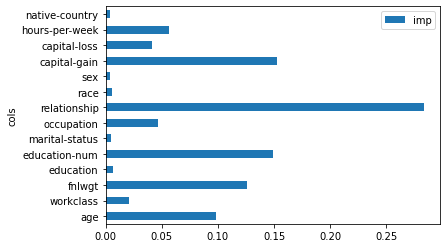

In [24]:
pd.DataFrame(dict(cols=X_train.columns, imp=clf.feature_importances_)).plot('cols', 'imp', 'barh');

## Random forest
Testando o treinamento de modelo com o algoritmo Random forest, sem a parametrização das colunas:

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(X_train, y_train);
mean_absolute_error(y_test, rf.predict(X_test))

0.1334254567787502

Testando com a seleção de importância de colunas:

In [32]:
feat_imp_dict = dict(zip(list(X_train.columns), list(clf.feature_importances_)))
sorted_feat_imp_dict = sorted(feat_imp_dict.items(), key=lambda x:x[1])
feat_imp = pd.DataFrame(feat_imp_dict.items(), columns=['column','values']).sort_values(by='values')
feat_imp = feat_imp.iloc[-5:]
feat_imp_cols = feat_imp.transpose().iloc[0].values
feat_imp_cols

array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'relationship'],
      dtype=object)

In [33]:
rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(X_train[feat_imp_cols], y_train);
mean_absolute_error(y_test, rf.predict(X_test[feat_imp_cols]))

0.1566098572086596

## Exportando o modelo

In [35]:
import joblib
joblib.dump(clf, '/home/model.pkl')

['/home/model.pkl']

# Deploy do modelo
É possível interagir com o deploy deste modelo em: [HuggingFace - Paulo Gontijo](https://huggingface.co/spaces/paulohgontijoo/tabular-fastai-lesson-6)

# Referências Bibliográficas

> https://course.fast.ai/Lessons/lesson6.html, acessado em 16/01/2023.

> https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb, acessado em 16/01/2023.

> https://www.kaggle.com/code/jhoward/how-random-forests-really-work/, acessado em 16/01/2023.

> https://www.kaggle.com/code/jhoward/first-steps-road-to-the-top-part-1, acessado em 16/01/2023.

> https://explained.ai/gradient-boosting/, acessado em 17/01/2023.

> http://cda.psych.uiuc.edu/statistical_learning_course/breiman_two_cultures.pdf, acessado em 17/01/2023.

> https://archive.ics.uci.edu/ml/datasets/Adult, acessado em 18/01/2023.

> https://edisciplinas.usp.br/pluginfile.php/4136542/mod_resource/content/1/decision_trees.pdf, acessado em 18/01/2023.

> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier, acessado em 18/01/2023.